<a href="https://colab.research.google.com/github/FAID-Nacera/Deep-Learning-CNN-/blob/main/Tp_Deep_Learning_CNN_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#============================
# Step 1: Installer les paquets
#============================

In [ ]:
# On désinstalle Keras au cas où une ancienne version causerait des conflits
!pip uninstall keras -y
# On installe TensorFlow et Keras pour utiliser l'API Keras intégrée à TensorFlow
!pip install tensorflow
!pip install keras

Found existing installation: keras 3.13.0
Uninstalling keras-3.13.0:
  Successfully uninstalled keras-3.13.0
  Using cached keras-3.13.0-py3-none-any.whl.metadata (6.3 kB)
Using cached keras-3.13.0-py3-none-any.whl (1.5 MB)


In [ ]:
#=================================
# Step 2: Import libraries
#=================================

In [ ]:
import os  # Gestion des chemins et fichiers
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Pour charger et augmenter les images
from tensorflow.keras.models import Sequential  # Pour construire un modèle séquentiel de CNN
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation  # Couches CNN
from tensorflow.keras import backend as K  # Pour vérifier le format des images (channels_first / channels_last)
import matplotlib.pyplot as plt  # Pour tracer les courbes d'apprentissage



/usr/local/lib/python3.12/dist-packages/keras/src/export/tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [ ]:
#=================================
# Step 3: Charger dataset
#=================================

In [ ]:
# Permet à l'utilisateur d'uploader des fichiers depuis mon ordinateur vers Colab
from google.colab import files
uploaded = files.upload()

Saving dataset.zip to dataset (2).zip


In [ ]:
#=================================
# Step 4: Section paramétres
#=================================

In [ ]:
# Taille des images d'entrée
img_width, img_height = 224, 224

# Chemins vers les dossiers de données pour entraînement et validation
train_data_dir = '/content/images/train'
validation_data_dir = '/content/images/test'

# Paramètres d'entraînement
nb_train_samples = 400  # Nombre total d'images d'entraînement
nb_validation_samples = 100  # Nombre total d'images de validation
epochs = 15  # Nombre d'itérations complètes sur le dataset
batch_size = 16  # Nombre d'images traitées simultanément
num_filters = 8  # Nombre de filtres pour la première couche convolutive
filter_size = 3  # Taille du filtre 3x3

# Vérification du format des images selon la configuration Keras
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)  # Format : (canaux, hauteur, largeur)
else:
    input_shape = (img_width, img_height, 3)  # Format : (hauteur, largeur, canaux)

print("Input shape:", input_shape)  # Affiche la forme attendue des images pour le CNN


Input shape: (224, 224, 3)


In [ ]:
#=================================
# Step 5: Section transformation données
#=================================

In [ ]:
# Générateur d'images pour l'entraînement avec augmentation pour éviter le surapprentissage
train_datagen = ImageDataGenerator(
    rescale=1./255,        # Normalisation des pixels entre 0 et 1
    shear_range=0.2,       # Application de transformations de cisaillement
    zoom_range=0.2,        # Application de zoom aléatoire
    horizontal_flip=True   # Retour horizontal aléatoire des images
)

# Générateur pour la validation, uniquement normalisation (pas d'augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

# Chargement des images d'entraînement depuis le dossier et application des transformations
train_generator = train_datagen.flow_from_directory(
    '/content/v_data/train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'  # Classification multi-classes
)

# Chargement des images de validation
validation_generator = test_datagen.flow_from_directory(
    '/content/v_data/test',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 400 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
#=================================
# Step 6: Section architecture du CNN
#=================================

In [ ]:
# Définition d'un modèle séquentiel (couches empilées)
model = Sequential()

# Couche convolutive 2D : extraction de caractéristiques
model.add(Conv2D(num_filters, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))  # Fonction d'activation ReLU pour non-linéarité

# Couche de pooling : réduction de la taille des cartes de caractéristiques
model.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatir les cartes de caractéristiques pour les envoyer aux couches denses
model.add(Flatten())

# Couche dense avec 24 neurones et activation ReLU
model.add(Dense(24))
model.add(Activation('relu'))

# Couche de sortie avec 2 neurones (2 classes) et softmax pour probabilité
model.add(Dense(2))
model.add(Activation('softmax'))

# Affichage du résumé du modèle : couches, formes de sortie, nombre de paramètres
print(model.summary())

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 8)    │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 222, 222, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 8)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 98568)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 24)             │     2,365,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 2)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,365,930 (9.03 MB)

 Trainable params: 2,365,930 (9.03 MB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
#=================================
# Step 7: Section entrainement du modéle et évaluation
#=================================

In [ ]:
# Compilation du modèle
# loss = categorical_crossentropy car classification multi-classes
# optimizer = RMSprop, metrics = accuracy pour suivre la précision
model.compile(
    loss='categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

# Entraînement du modèle avec les générateurs d'images
history = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size
)

Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 293ms/step - accuracy: 0.4750 - loss: 2.0312 - val_accuracy: 0.4792 - val_loss: 0.6934
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 299ms/step - accuracy: 0.5000 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 363ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 413ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5208 - val_loss: 0.6930
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 406ms/step - accuracy: 0.5000 - loss: 0.6933 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 422ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.4850 - loss: 0.6933 - val_accuracy: 0.5104 - val_loss: 0.6931
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 399ms/step - accuracy: 0.4850 - loss: 0.6933 - val_accura

In [ ]:
#=================================
# Step 8: Section visualisation
#=================================

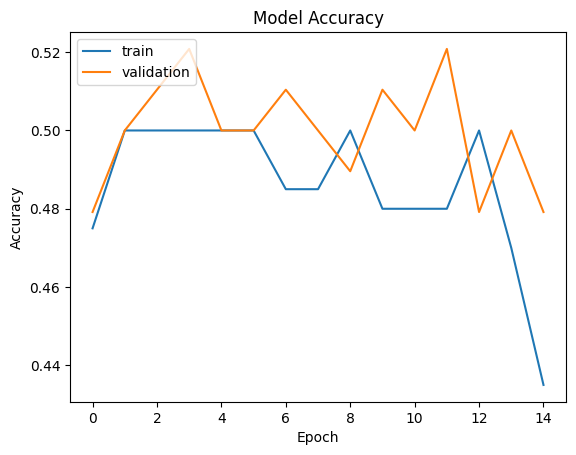

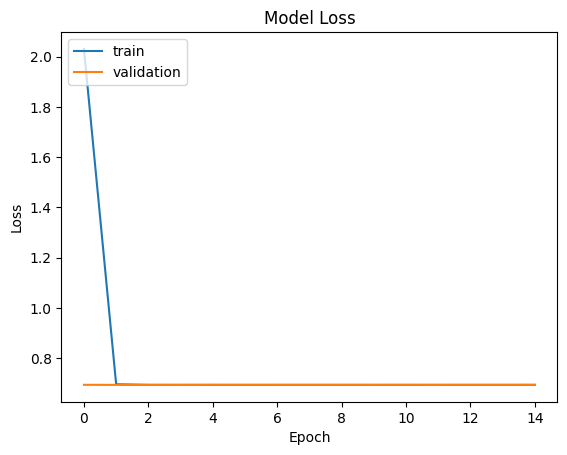

In [ ]:
# Tracé des courbes de précision (accuracy) sur les données d'entraînement et de validation
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Tracé des courbes de perte (loss) sur les données d'entraînement et de validation
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()